In [5]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 8.1 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 14.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 17.0 MB/s eta 0:00:00


In [7]:
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 MB 4.9 MB/s eta 0:00:00m eta 0:00:010:00:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 17.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 8.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 17.9 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 6.5 MB/s eta 0:00:00m eta 0:00:010:00:01


In [4]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.0/459.0 kB 4.0 MB/s eta 0:00:000:00:01m eta 0:00:01


In [25]:
import pandas as pd
import transformers
from transformers import pipeline
import re
from transformers import AutoTokenizer
import torch
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
#from pandas_profiling import ProfileReport
from wordcloud import WordCloud, STOPWORDS

In [9]:
print(torch.__version__)
print(transformers.__version__)

1.13.1+cu117
4.26.1


In [10]:
pd.set_option('display.max_colwidth', None)

In [11]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [12]:
df_train.sample(2)

id       keyword     location  \
714    1032      bleeding          NaN   
7313  10467  wild%20fires  New Jersey    

                                                                text  target  
714   you could slit my throat and I'd apologize for bleeding on you       0  
7313                            These wild fires out west are crazy.       1

In [13]:
df_train.describe()

id      target
count   7613.000000  7613.00000
mean    5441.934848     0.42966
std     3137.116090     0.49506
min        1.000000     0.00000
25%     2734.000000     0.00000
50%     5408.000000     0.00000
75%     8146.000000     1.00000
max    10873.000000     1.00000

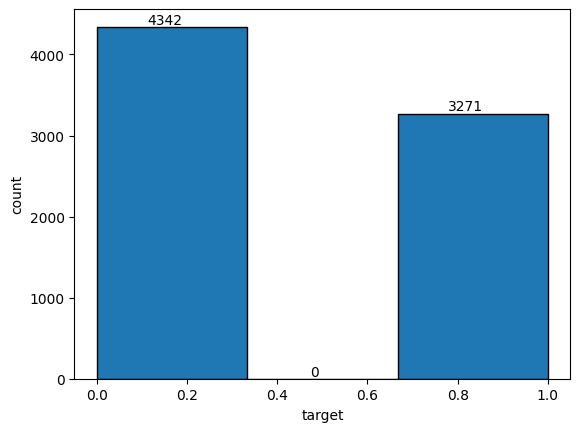

In [14]:
counts, bins, _ = plt.hist(df_train['target'], bins=3, edgecolor='black')

#print(_)
# add text to each bar
for i in range(len(counts)):
   # print(i)
    plt.text(bins[i]+0.15, counts[i]+0.5, int(counts[i]), ha='center', va='bottom')

# set the x and y axis labels
plt.xlabel('target')
plt.ylabel('count')

# display the plot
plt.show()


In [11]:
df_train.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [12]:
df_test.isna().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [13]:
profile = ProfileReport(df_train, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
df_train.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [15]:
# drop location data
clean_train = df_train.drop(columns="location")
clean_test = df_test.drop(columns="location")

In [24]:
clean_train.sample(10)

id    keyword  \
6139  8758      siren   
4113  5845  hailstorm   
3541  5063     famine   
790   1145     blight   
73     105   accident   
763   1104  blew%20up   
2399  3451     derail   
6843  9806    trapped   
1956  2817    cyclone   
5628  8028   refugees   

                                                                                                                         text  \
6139  So when r u getting married'@Foxy__Siren: Oh finally Jennifer Aniston got married??????... I'm so happy for her ??????'   
4113                                          @AdriaSimon_: Hailstorm day 2.... #round2 #yyc #yycstorm http://t.co/FqQI8GVLQ4   
3541                                  'Food crematoria' provoke outrage amid crisis famine memories... http://t.co/fABVlvN5MS   
790       Carl Everest Rob Cobes Whitt Blight Frost Leo Snuff Godly and a few others. I will drink a beer with them. Someday.   
73                                                                                        BigRigRadio Live Accident Awareness   
763                                                                                       I blew up snapchat for no reason ??   
2399                              Here's what may have caused a Metro train to derail in downtown D.C. http://t.co/mEiSNKv5Tb   
6843                                            Hollywood movie about trapped miners released in Chile http://t.co/xe0EE1Fzfh   
1956                                     @XHNews We need these plants in the pacific during the cyclone seasons it would help   
5628                                      y'all read 12000 Nigerian refugees repatriated from Cameroon http://t.co/aVwE1LBvhn   

      target  
6139       0  
4113       1  
3541       1  
790        0  
73         1  
763        0  
2399       1  
6843       0  
1956       1  
5628       1

In [16]:
clean_train.shape

(7613, 4)

222 unique words in the keyword column for train data.


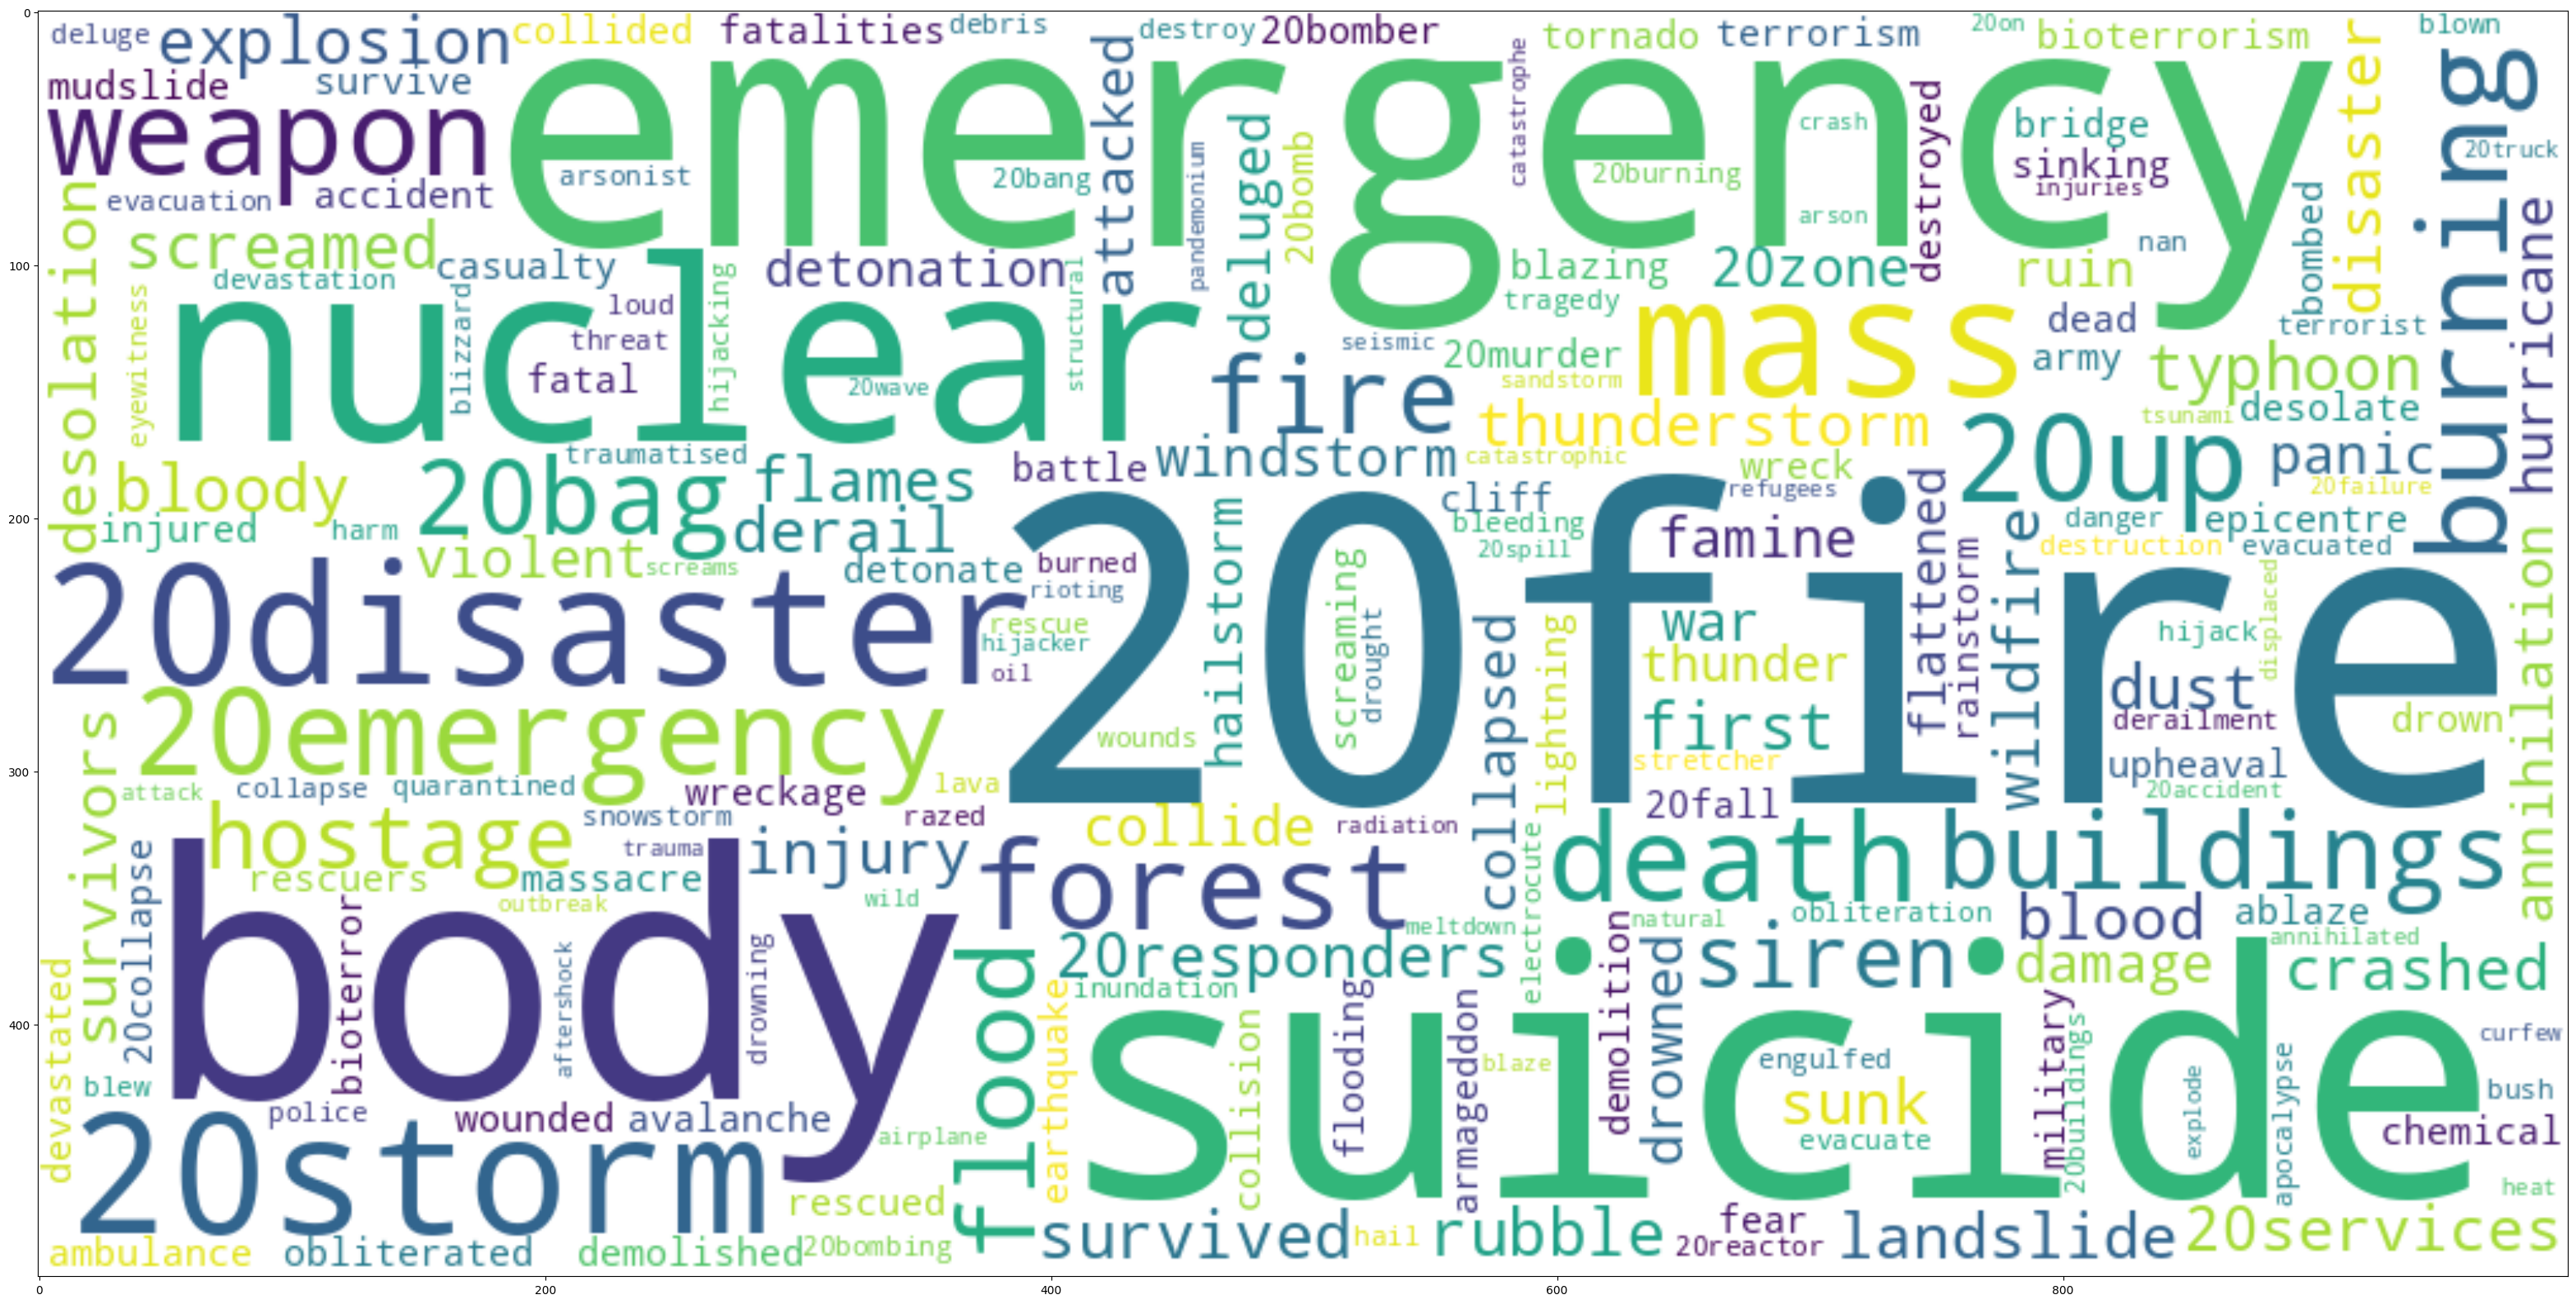

In [23]:
text = " ".join(set(word for word in clean_train['keyword'].astype(str)))
print(f"{len(set(text.split()))} unique words in the keyword column for train data.")
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=1000, height=500).generate(text)
plt.figure(figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

222 unique words in the keyword column for train data.


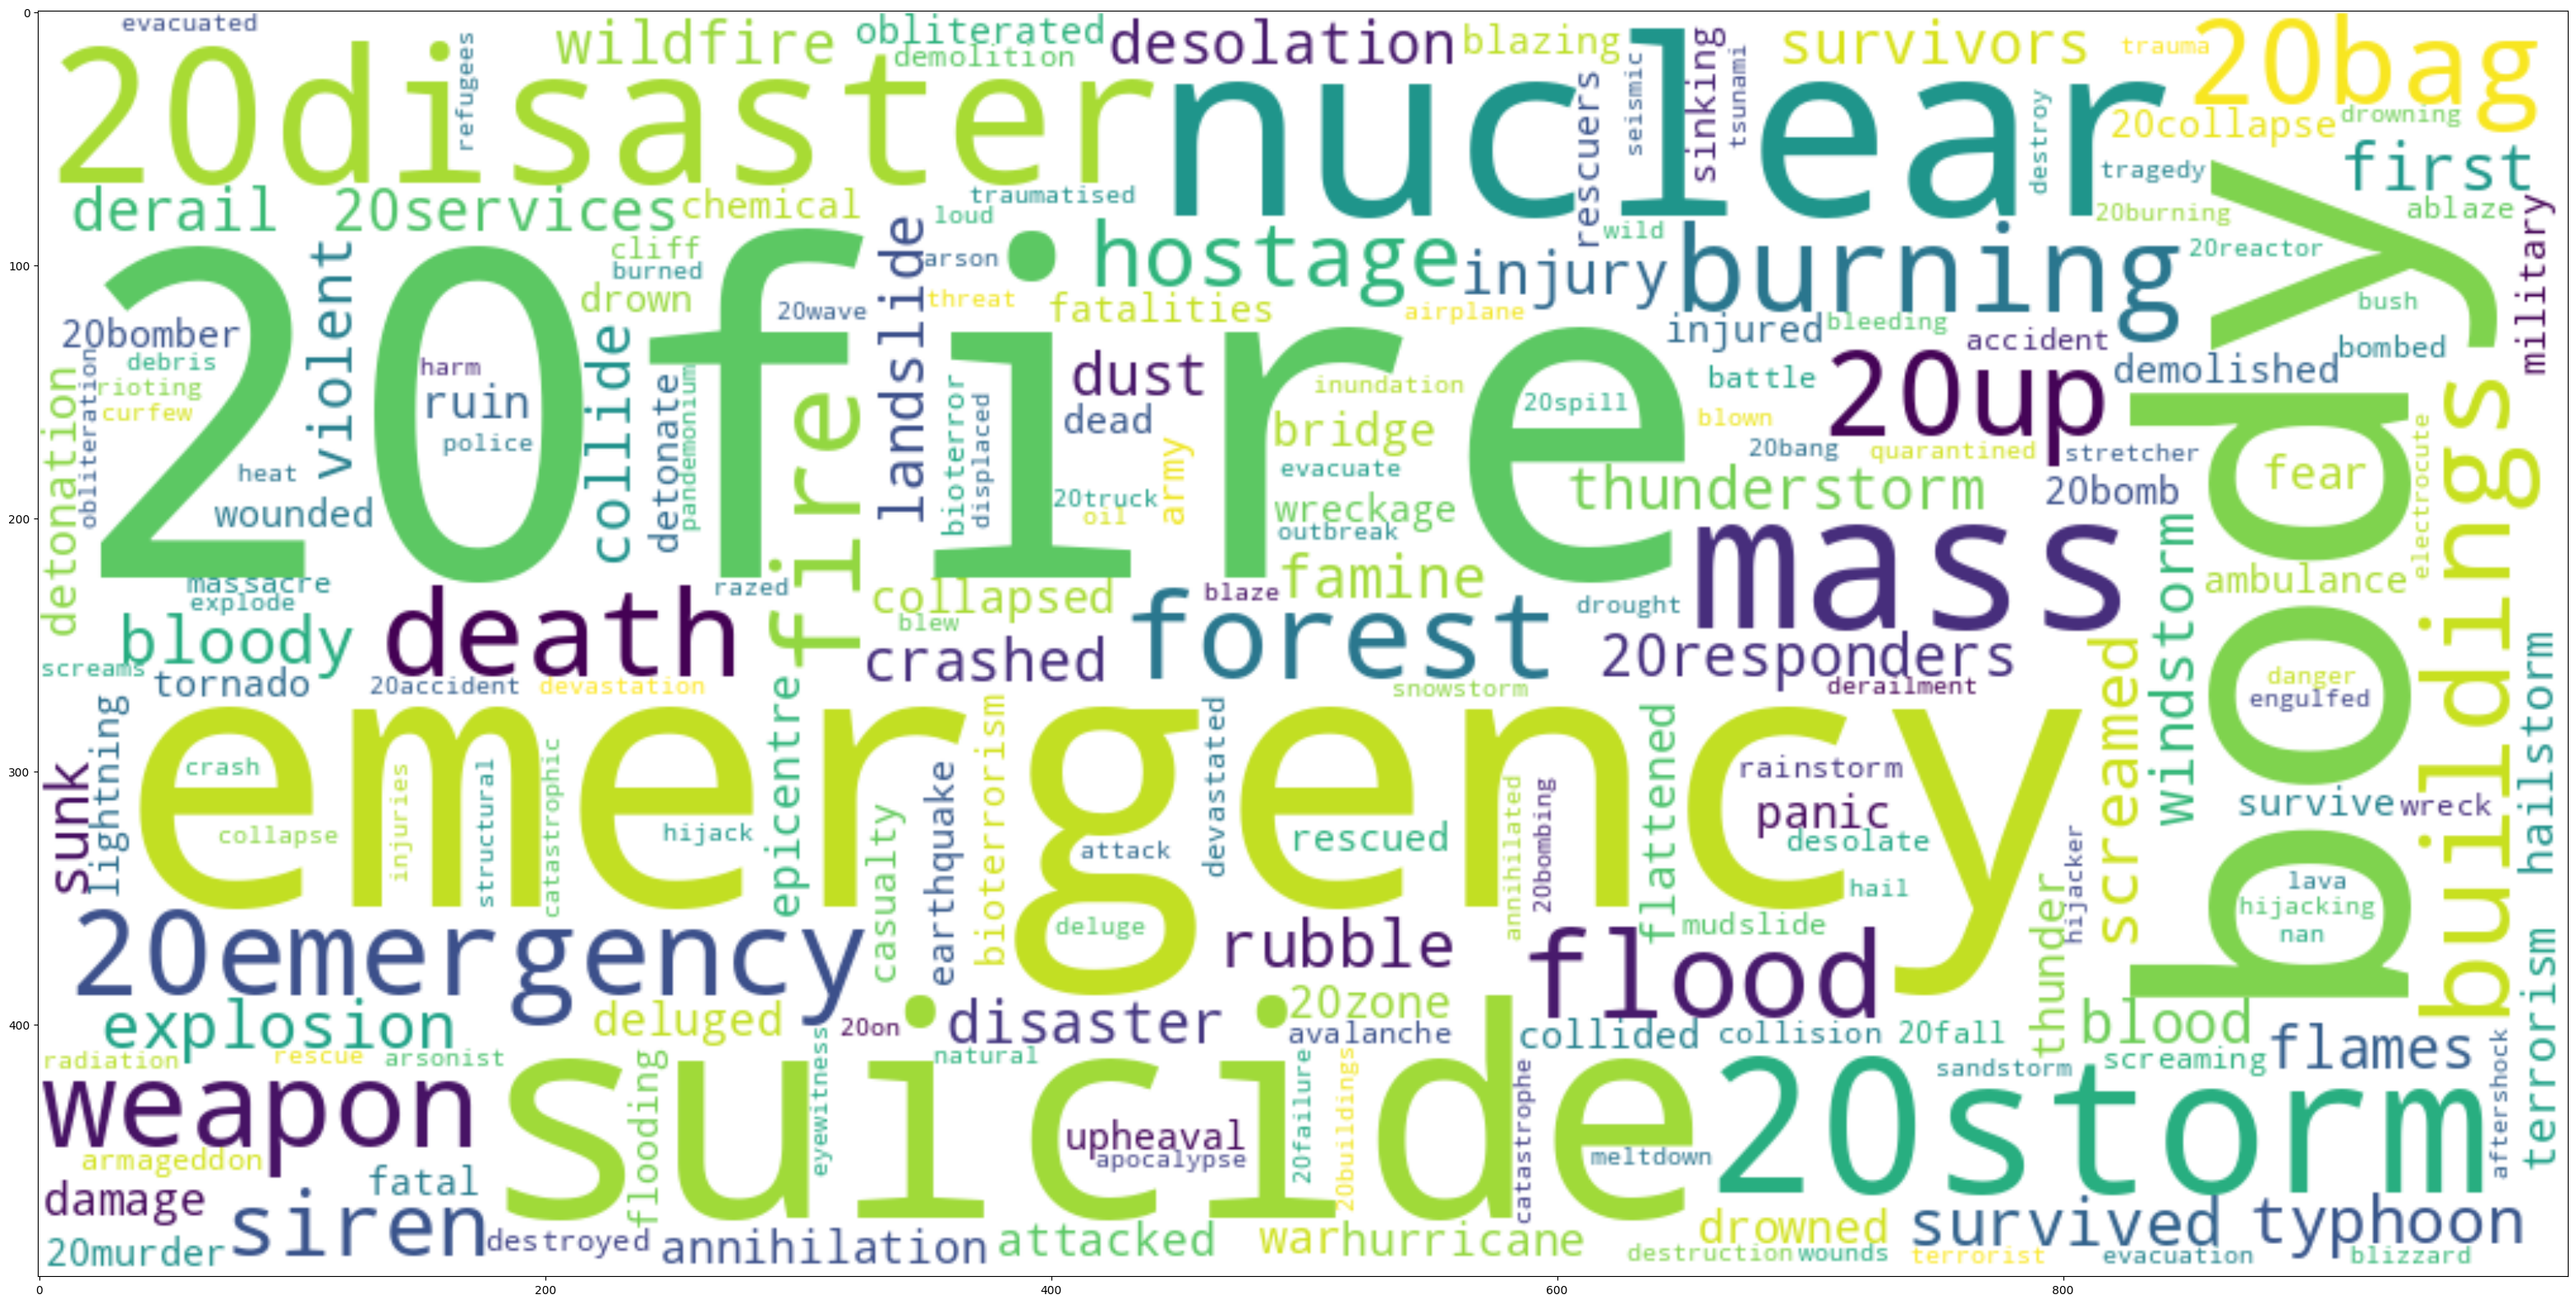

In [22]:
text = " ".join(set(word for word in clean_test['keyword'].astype(str)))
print(f"{len(set(text.split()))} unique words in the keyword column for train data.")
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=1000, height=500).generate(text)
plt.figure(figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [26]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/vijitha/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [28]:
clean_train = clean_train.dropna(subset=['keyword']).reset_index(drop=True)

In [30]:
# we fill none into the Nan Values, to give 0 sentiment
clean_test['keyword'] = clean_test['keyword'].fillna("None")

In [8]:
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove special characters and punctuations
    text = re.sub(r'[^\w\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Convert to lowercase
    text = text.lower()
    
    return text

In [9]:
# Apply the clean_text function to the 'tweet' column
df['text'] = df_tweet['text'].apply(clean_text)

In [10]:
df['text'].head(2)

0    our deeds are the reason of this earthquake may allah forgive us all
1                                   forest fire near la ronge sask canada
Name: text, dtype: object

In [11]:
# Load the tokenizer for a specific pre-trained model
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [13]:
def tokenize_tweet(tweet):
    tokenized_tweet = tokenizer.encode_plus(tweet, add_special_tokens=True, 
                                             return_attention_mask=True, 
                                             return_tensors='pt')
    return tokenized_tweet

In [17]:
# Apply the tokenize_tweet function to the 'tweet' column
df['tokenized_tweet'] = df['text'].apply(tokenize_tweet)

# Print the original and tokenized tweet columns
print(df['tokenized_tweet'])

0       [input_ids, token_type_ids, attention_mask]
1       [input_ids, token_type_ids, attention_mask]
2       [input_ids, token_type_ids, attention_mask]
3       [input_ids, token_type_ids, attention_mask]
4       [input_ids, token_type_ids, attention_mask]
                           ...                     
7608    [input_ids, token_type_ids, attention_mask]
7609    [input_ids, token_type_ids, attention_mask]
7610    [input_ids, token_type_ids, attention_mask]
7611    [input_ids, token_type_ids, attention_mask]
7612    [input_ids, token_type_ids, attention_mask]
Name: tokenized_tweet, Length: 7613, dtype: object


In [13]:
tokenizer.decode(df["input_ids"])

KeyError: 'input_ids'